In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:>

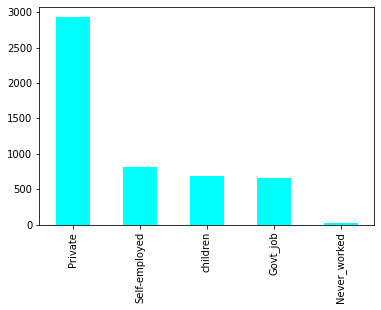

In [3]:
df['work_type'].value_counts().plot(kind='bar', color='cyan')

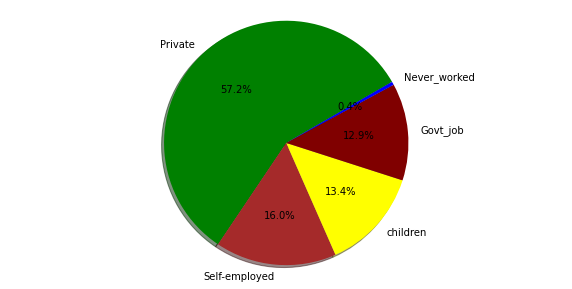

In [4]:
labels = ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked']


fig1, ax1 = plt.subplots(figsize=(10, 5))
colors = ['green', 'brown', 'yellow', 'maroon', 'blue']
ax1.pie(df['work_type'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=30, colors=colors)
#Theme
ax1.axis('equal')
plt.show()

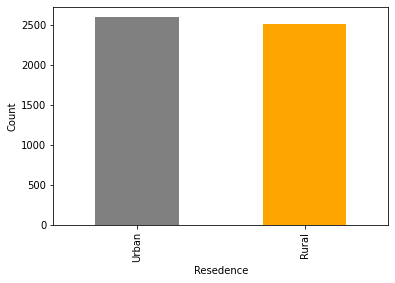

In [5]:
df['Residence_type'].value_counts().plot(kind='bar', color=['grey', 'orange'])
plt.xlabel('Resedence')
plt.ylabel('Count')

#Set the style 
plt.style.use('seaborn-whitegrid')


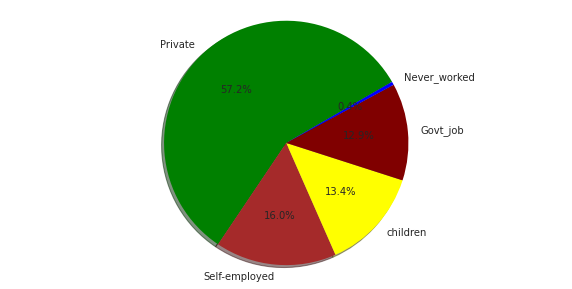

In [6]:
labels = ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked']


fig1, ax1 = plt.subplots(figsize=(10, 5))
colors = ['green', 'brown', 'yellow', 'maroon', 'blue']
ax1.pie(df['work_type'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=30, colors=colors)
#Theme
ax1.axis('equal')
plt.show()

Text(0, 0.5, 'Counts')

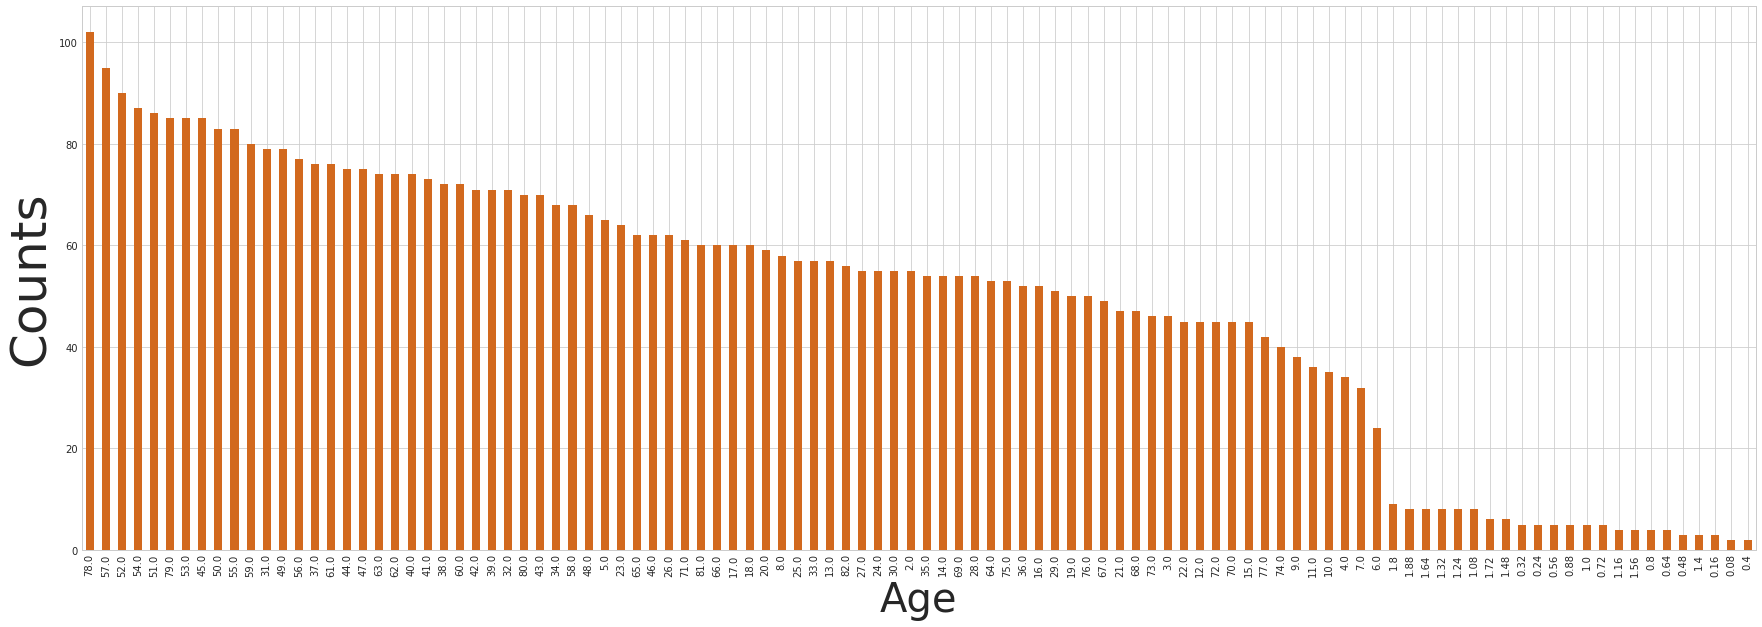

In [7]:
plt.figure(figsize=(30, 10))
df['age'].value_counts().plot(kind='bar', color='chocolate')
plt.xlabel('Age', fontsize=40)
plt.ylabel('Counts', fontsize=50)

In [8]:
df['smoking_status'].value_counts()


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

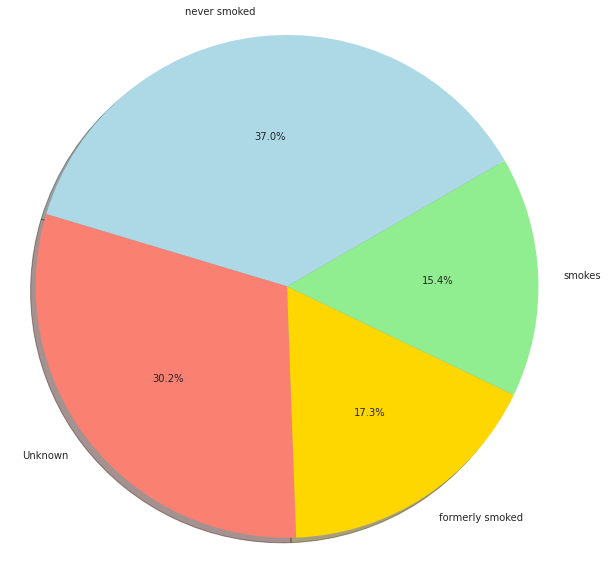

In [9]:
labels = ['never smoked', 'Unknown', 'formerly smoked', 'smokes']


fig1, ax1 = plt.subplots(figsize=(10, 10))
colors = ['lightblue', 'salmon', 'gold', 'lightgreen']
ax1.pie(df['smoking_status'].value_counts(),  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30, colors=colors)
#Theme
ax1.axis('equal')
plt.show()

In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

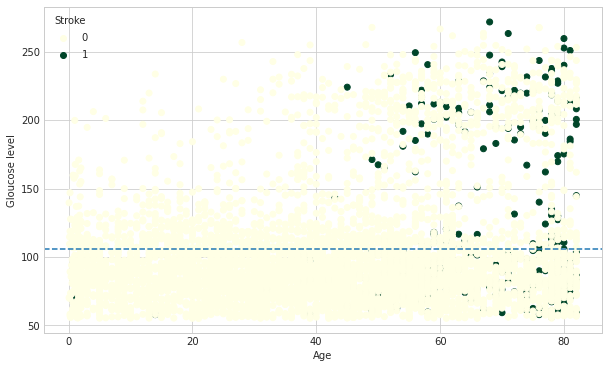

In [11]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))
## plot the data
scatter = ax.scatter(x= df["age"],
                    y=df["avg_glucose_level"],
                    c=df["stroke"], cmap='YlGn');
# Customize the plot
ax.set(
      xlabel = "Age",
     ylabel ="Gloucose level");
# Addd a legend
ax.legend(*scatter.legend_elements(),title="Stroke");

# Add a horizontal line
ax.axhline(df["avg_glucose_level"].mean(),linestyle='--');


<AxesSubplot:xlabel='age', ylabel='gender'>

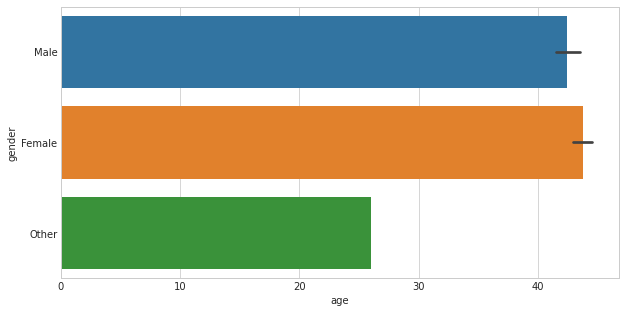

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='age', y='gender')


Text(0, 0.5, 'Stroke')

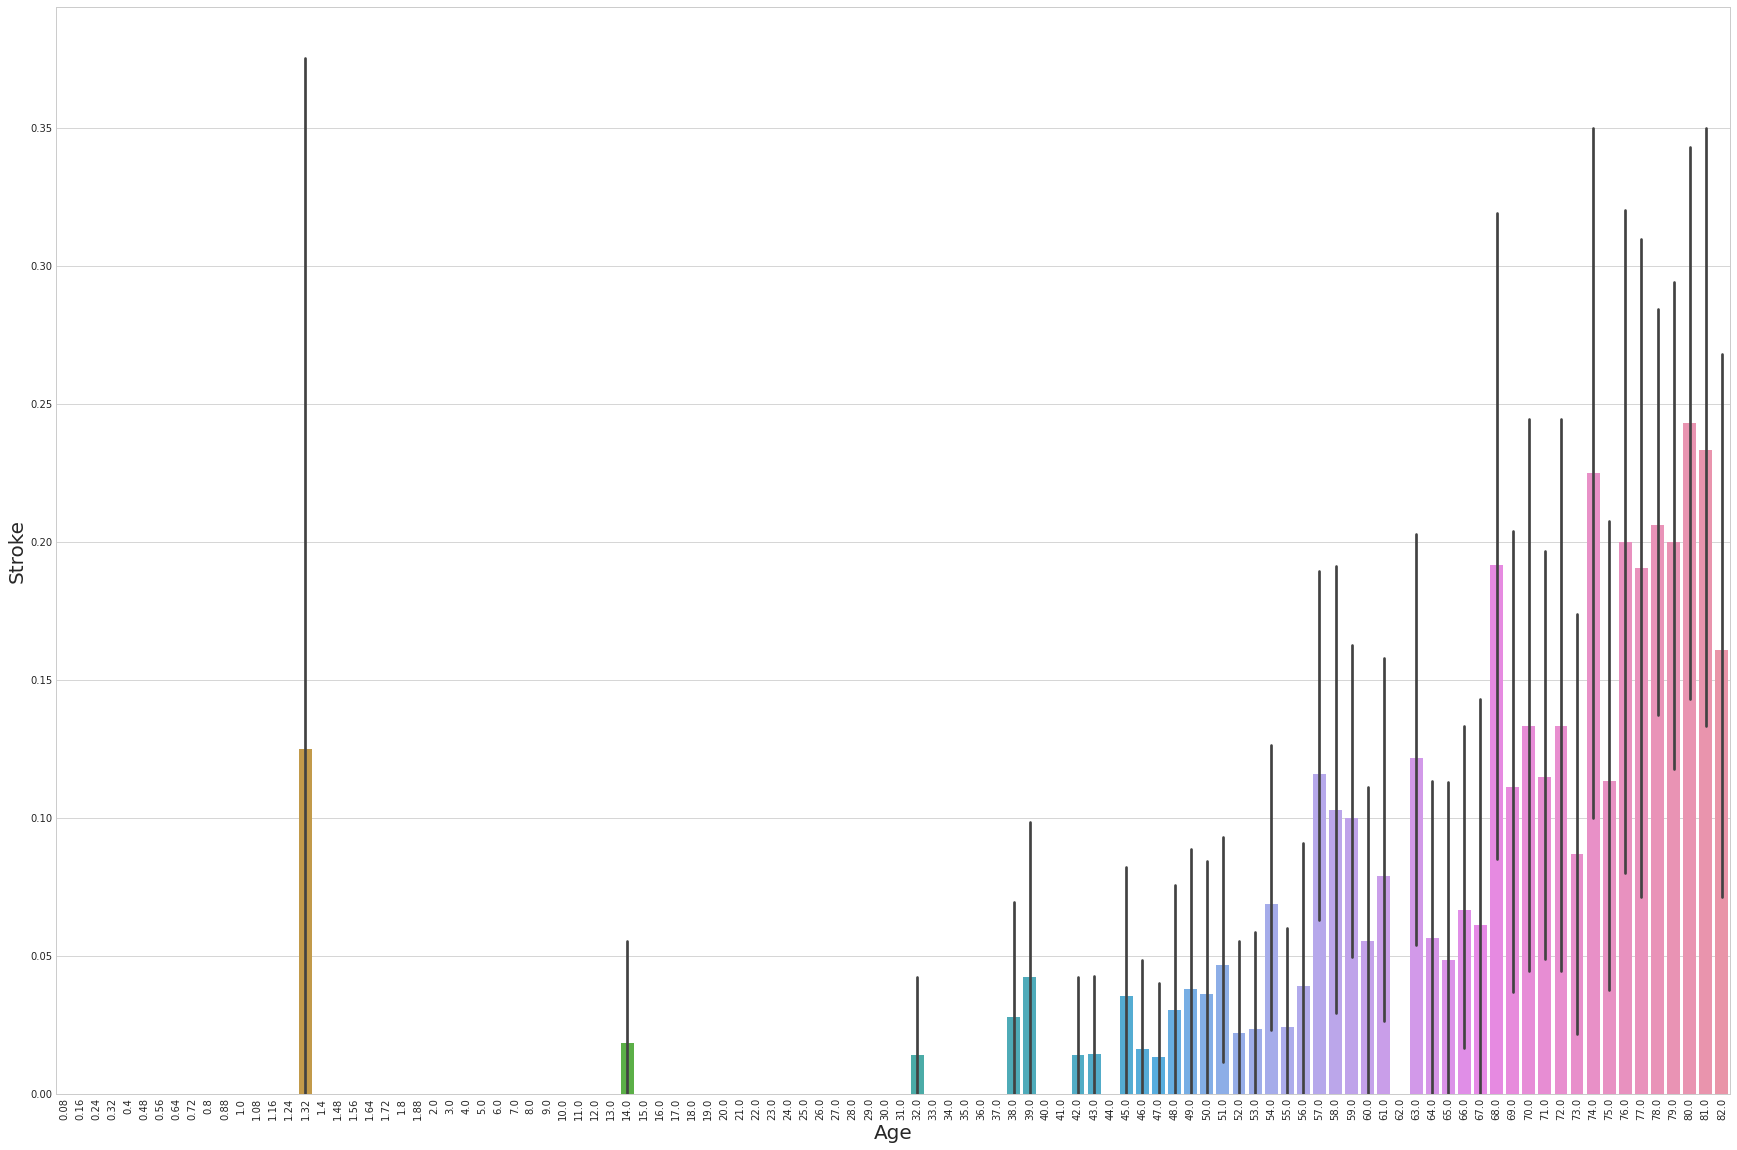

In [13]:
plt.figure(figsize=(30,20))
sns.barplot(data=df, x='age', y='stroke')
plt.xticks(rotation=90)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Stroke', fontsize=20)

Text(0, 0.5, 'Hypertension')

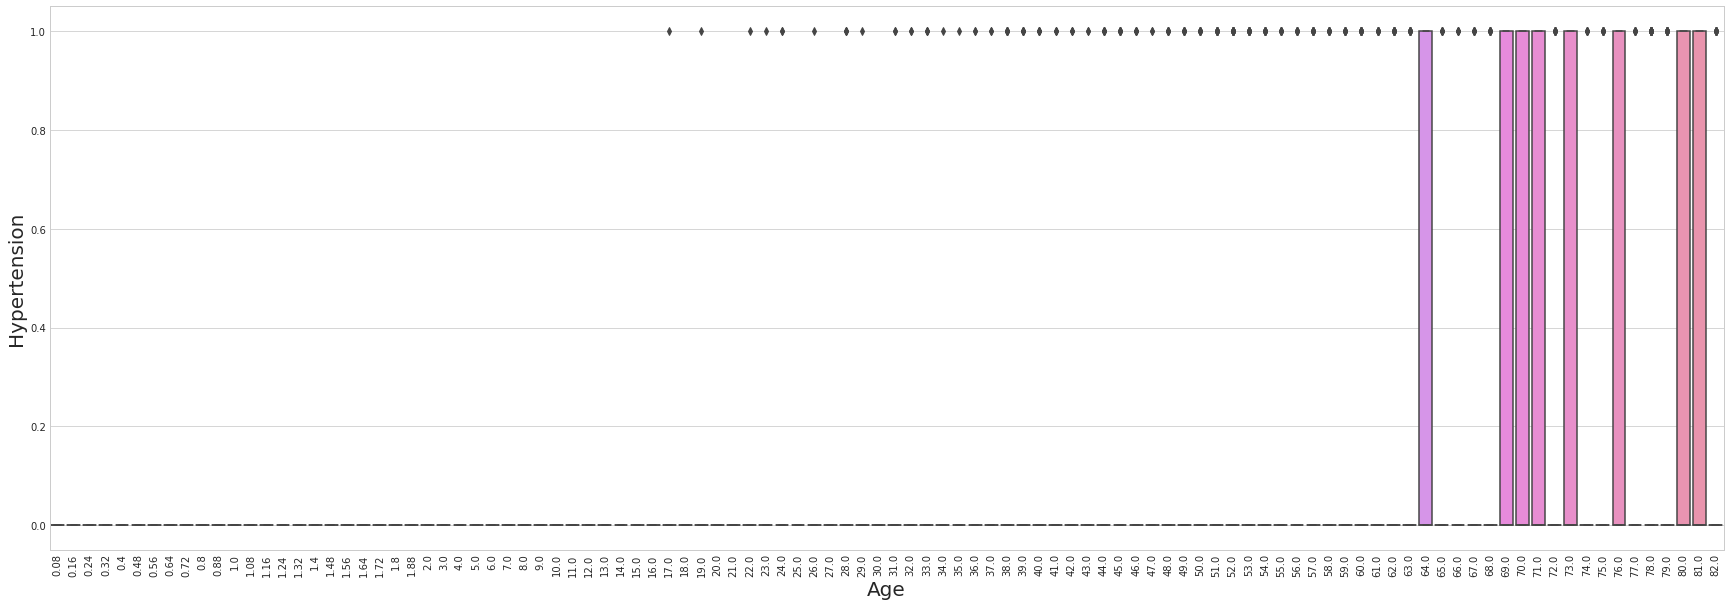

In [14]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df, x='age', y='hypertension')
plt.xticks(rotation=90)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Hypertension', fontsize=20)

In [15]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Text(0, 0.5, 'Hear Disease')

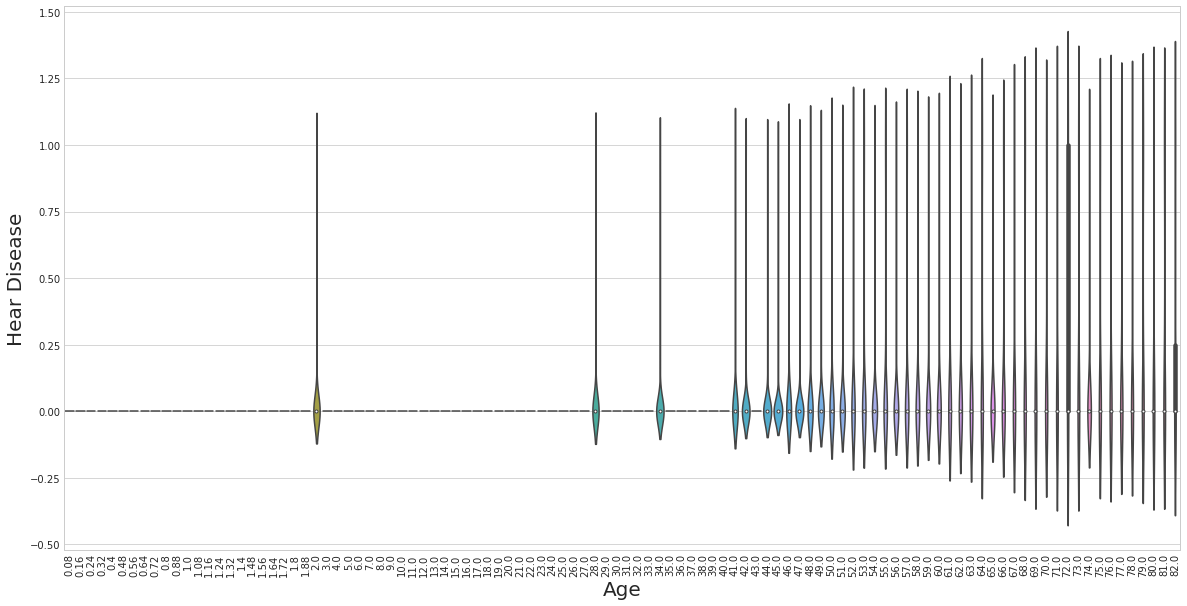

In [16]:
plt.figure(figsize=(20,10))
sns.violinplot(data=df, x='age', y='heart_disease')
plt.xticks(rotation=90)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Hear Disease', fontsize=20)

## Datacleaning

In [17]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
def preprocess_image(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
    return df

In [20]:
df = preprocess_image(df=df)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,2,67.0,0,1,2,3,2,228.69,36.6,2,1
1,51676,1,61.0,0,0,2,4,1,202.21,28.1,3,1
2,31112,2,80.0,0,1,2,3,1,105.92,32.5,3,1
3,60182,1,49.0,0,0,2,3,2,171.23,34.4,4,1
4,1665,1,79.0,1,0,2,4,1,174.12,24.0,3,1


In [21]:
# Check again
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
df.dtypes

id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object

# split the dataset


In [23]:
X = df.drop('stroke', axis=1)
y = df['stroke']

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

### Import required libraries

In [24]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score

### RandomForestClassifier

Score : 0.9393346379647749
Cross_val_score : 0.9499021526418787
**************************************************
Accuracy_score : 93.93%
Precision_score : 0.0
Recall_score : 0.0
F1_score : 0.0
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



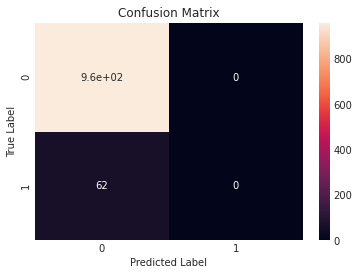

In [25]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
clf_score = clf.score(X_test, y_test)*100
print(f"Score : {clf.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

## GradientBoostClassifier

Score : 0.9373776908023483
Cross_val_score : 0.9475538160469668
**************************************************
Accuracy_score : 93.74%
Precision_score : 0.0
Recall_score : 0.0
F1_score : 0.0
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



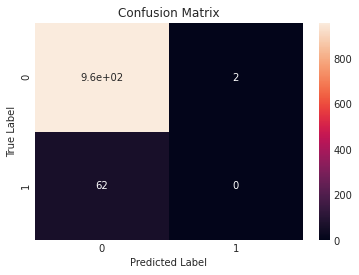

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(42)

clf2 = GradientBoostingClassifier()
clf2.fit(X_train, y_train)
y_preds = clf2.predict(X_test)
clf2_score = clf2.score(X_test, y_test)*100

print(f"Score : {clf2.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf2, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

### AdaBoostClassifier

Score : 0.9403131115459883
Cross_val_score : 0.9499021526418787
**************************************************
Accuracy_score : 94.03%
Precision_score : 0.6666666666666666
Recall_score : 0.03225806451612903
F1_score : 0.06153846153846154
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.67      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.80      0.52      0.52      1022
weighted avg       0.92      0.94      0.91      1022



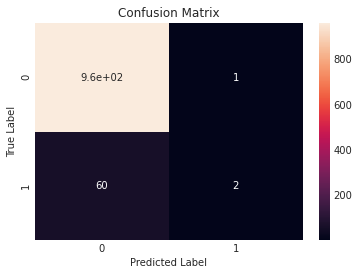

In [27]:
from sklearn.ensemble import AdaBoostClassifier

np.random.seed(42)
clf3 = AdaBoostClassifier()
clf3.fit(X_train, y_train)
y_preds = clf3.predict(X_test)
clf3_score = clf3.score(X_test, y_test)*100
print(f"Score : {clf3.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf3, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

## LogisticRegression

Score : 0.9393346379647749
Cross_val_score : 0.9506849315068493
**************************************************
Accuracy_score : 93.93%
Precision_score : 0.5
Recall_score : 0.016129032258064516
F1_score : 0.03125
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022



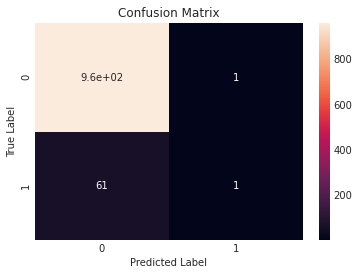

In [28]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
clf4 = LogisticRegression()
clf4.fit(X_train, y_train)
y_preds = clf4.predict(X_test)
clf4_score = clf4.score(X_test, y_test)*100

print(f"Score : {clf4.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf4, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

# Decision Tree

Score : 0.9060665362035225
Cross_val_score : 0.9076320939334638
**************************************************
Accuracy_score : 90.61%
Precision_score : 0.18518518518518517
Recall_score : 0.16129032258064516
F1_score : 0.17241379310344826
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.19      0.16      0.17        62

    accuracy                           0.91      1022
   macro avg       0.57      0.56      0.56      1022
weighted avg       0.90      0.91      0.90      1022



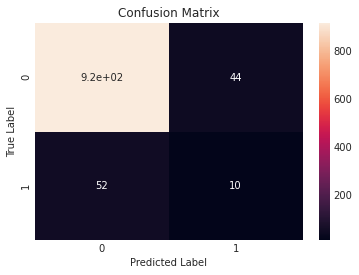

In [29]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)
clf5= DecisionTreeClassifier()
clf5.fit(X_train, y_train)

y_preds = clf5.predict(X_test)
clf5_score = clf5.score(X_test, y_test)*100
print(f"Score : {clf5.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf5, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

### LinearSVC

Score : 0.9393346379647749
Cross_val_score : 0.7747553816046967
**************************************************
Accuracy_score : 93.93%
Precision_score : 0.5
Recall_score : 0.016129032258064516
F1_score : 0.03125
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022



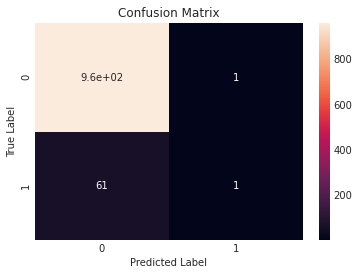

In [30]:
from sklearn.svm import LinearSVC
np.random.seed(42)
clf6 = LinearSVC()
clf6.fit(X_train, y_train)
y_preds = clf6.predict(X_test)

clf6_score = clf6.score(X_test, y_test)*100
print(f"Score : {clf6.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf6, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

### KNN

Score : 0.9393346379647749
Cross_val_score : 0.9512720156555773
**************************************************
Accuracy_score : 93.93%
Precision_score : 0.0
Recall_score : 0.0
F1_score : 0.0
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



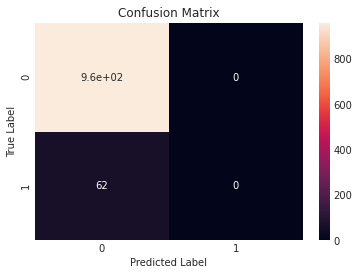

In [31]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
clf7 = KNeighborsClassifier()
clf7.fit(X_train, y_train)
y_preds = clf7.predict(X_test)

clf7_score = clf7.score(X_test, y_test)*100
print(f"Score : {clf7.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf7, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

### XGBoost

[07:37:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score : 0.9373776908023483
[07:37:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:37:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:37:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd

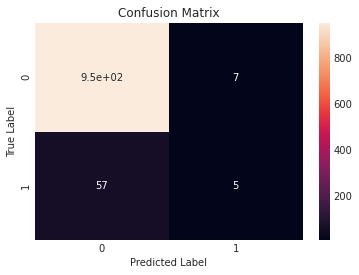

In [32]:
from xgboost import XGBClassifier
np.random.seed(42)
clf8 = XGBClassifier()
clf8.fit(X_train, y_train)

y_preds = clf8.predict(X_test)
clf8_score = clf8.score(X_test, y_test)*100

print(f"Score : {clf8.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf8, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

### Catboost

Learning rate set to 0.018795
0:	learn: 0.6666213	total: 55.3ms	remaining: 55.2s
1:	learn: 0.6395841	total: 58.7ms	remaining: 29.3s
2:	learn: 0.6089709	total: 61.7ms	remaining: 20.5s
3:	learn: 0.5809655	total: 64.8ms	remaining: 16.1s
4:	learn: 0.5553369	total: 67.8ms	remaining: 13.5s
5:	learn: 0.5308311	total: 70.6ms	remaining: 11.7s
6:	learn: 0.5091447	total: 73.5ms	remaining: 10.4s
7:	learn: 0.4909119	total: 76.4ms	remaining: 9.47s
8:	learn: 0.4744015	total: 78.6ms	remaining: 8.66s
9:	learn: 0.4544757	total: 81.6ms	remaining: 8.08s
10:	learn: 0.4353419	total: 84.6ms	remaining: 7.6s
11:	learn: 0.4214819	total: 86.4ms	remaining: 7.11s
12:	learn: 0.4089891	total: 88.5ms	remaining: 6.72s
13:	learn: 0.3933625	total: 91.3ms	remaining: 6.43s
14:	learn: 0.3819220	total: 94.4ms	remaining: 6.2s
15:	learn: 0.3676312	total: 97.1ms	remaining: 5.97s
16:	learn: 0.3573065	total: 100ms	remaining: 5.79s
17:	learn: 0.3456174	total: 103ms	remaining: 5.62s
18:	learn: 0.3337259	total: 106ms	remaining: 5.4

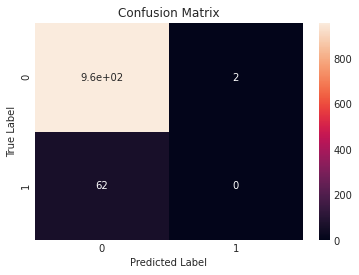

In [33]:
from catboost import CatBoostClassifier
np.random.seed(42)
clf9 = CatBoostClassifier()
clf9.fit(X_train, y_train)
y_preds = clf9.predict(X_test)

clf9_score = clf9.score(X_test, y_test)*100
print(f"Score : {clf9.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf9, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

### LGBMClassifier

Score : 0.9383561643835616
Cross_val_score : 0.9450097847358121
**************************************************
Accuracy_score : 93.84%
Precision_score : 0.42857142857142855
Recall_score : 0.04838709677419355
F1_score : 0.08695652173913042
**************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.43      0.05      0.09        62

    accuracy                           0.94      1022
   macro avg       0.69      0.52      0.53      1022
weighted avg       0.91      0.94      0.91      1022



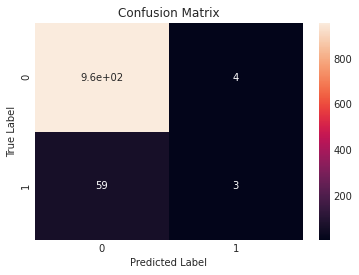

In [34]:
from lightgbm import LGBMClassifier
np.random.seed(42)
clf10 = LGBMClassifier()
clf10.fit(X_train, y_train)
y_preds = clf10.predict(X_test)

clf10_score = clf10.score(X_test, y_test)*100
print(f"Score : {clf10.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(clf10, X, y, cv=5))}")
print("*"* 50)
print(f"Accuracy_score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision_score : {precision_score(y_test, y_preds)}")
print(f"Recall_score : {recall_score(y_test, y_preds)}")
print(f"F1_score : {f1_score(y_test, y_preds)}")
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
print("Classification Report")
print(f"{classification_report(y_test, y_preds)}")

### KNN and Logisitic regression are performed best with (95%) than other models 